In [9]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
current_path = os.getcwd()
print(current_path)
os.chdir("SalesAnalysis/Sales_Data")
sales_files = os.listdir()
print(sales_files)

C:\Users\Thomas\desktop\Pandas-Data-Science-Tasks
['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
# First we merge all 12 months of sales data into a single dataframe
all_sales = pd.DataFrame()
for file in sales_files:
    data = pd.read_csv(file)
    all_sales = pd.concat([all_sales, data], ignore_index=True)

In [4]:
print(all_sales.head());
print("-"*40);
print(all_sales.tail(5));

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
----------------------------------------
       Order ID                 Product Quantity Ordered Price Each  \
186845   259353  AAA Batteries (4-pack)                3       2.99   
186846   259354                  iPhone         

In [5]:
# What was the best month for sales and how much was earned that month?

In [6]:
sales_per_month = {"01":0.00, "02":0.00, "03":0.00, "04":0.00, "05":0.00, "06":0.00, "07":0.00, "08":0.00, "09":0.00, "10":0.00, "11":0.00, "12":0.00}
dates = all_sales["Order Date"]
prices = all_sales["Price Each"]
amount = all_sales["Quantity Ordered"]
index = 0
month_regex = re.compile(r"^(\d\d)")

for date in dates:
    if date == "Order Date":
        pass
    else:
        if isinstance(date, str):
            month = month_regex.search(date).group()
            sales_per_month[month] += (float(prices[index]) * float(amount[index]))
    index+=1


In [7]:
print(sales_per_month)
largest_value_earned = max(sales_per_month.values())
month = list(sales_per_month.values()).index(max(sales_per_month.values()))
print("The largest value earned in a month is: ", round(largest_value_earned, 2))
print("in month", list(sales_per_month.keys())[month])

{'01': 1822256.729999914, '02': 2202022.4199999636, '03': 2807100.3800003603, '04': 3390670.240000704, '05': 3152606.750000553, '06': 2577802.260000178, '07': 2647775.7600002377, '08': 2244467.8799999943, '09': 2097560.129999891, '10': 3736726.8800009703, '11': 3199603.200000589, '12': 4613443.340001534}
The largest value earned in a month is:  4613443.34
in month 12


In [11]:
# This makes sense because of Christmas

Text(0.5, 0, 'Month Number')

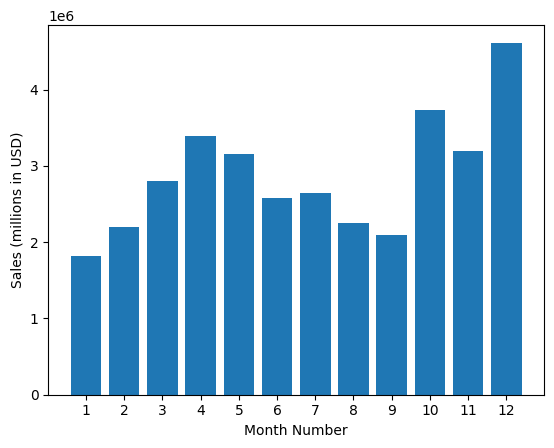

In [17]:
months = range(1, 13)

plt.bar(months, list(sales_per_month.values()))
plt.xticks(months)
plt.ylabel("Sales (millions in USD)")
plt.xlabel("Month Number")

In [20]:
#Next task: What city had the highest number of sales?

In [47]:
addresses = all_sales["Purchase Address"]
print(addresses)

0                    917 1st St, Dallas, TX 75001
1                                             NaN
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 186850, dtype: object


In [59]:
sales_by_location = {}
index = 0
for address in addresses:
    if address == "Purchase Address":
        pass
    else:
        if isinstance(address, str):
            city = list(address.split(","))[1] + ", " + list(address.split(","))[2][1:3]
            if city in sales_by_location.keys():
                sales_by_location[city] += (float(prices[index]) * float(amount[index]))
            else:
                sales_by_location[city] = 0
                sales_by_location[city] += (float(prices[index]) * float(amount[index]))
    index+=1


In [60]:
print(sales_by_location)

{' Dallas, TX': 2767975.40000032, ' Boston, MA': 3661642.010000925, ' Los Angeles, CA': 5452570.80000207, ' San Francisco, CA': 8262203.910004012, ' Seattle, WA': 2747755.4800003143, ' Atlanta, GA': 2795498.5800003405, ' New York City, NY': 4664317.430001556, ' Portland, OR': 1870732.3399999149, ' Austin, TX': 1819581.7499999092, ' Portland, ME': 449758.2699999996}


In [62]:
largest_value_earned = max(sales_by_location.values())
location = list(sales_by_location.values()).index(max(sales_by_location.values()))
print("The largest value earned in a location is: ", round(largest_value_earned, 2))
print("in ", list(sales_by_location.keys())[location])

The largest value earned in a location is:  8262203.91
in   San Francisco, CA


Text(0, 0.5, 'Sales Amount (millions in USD)')

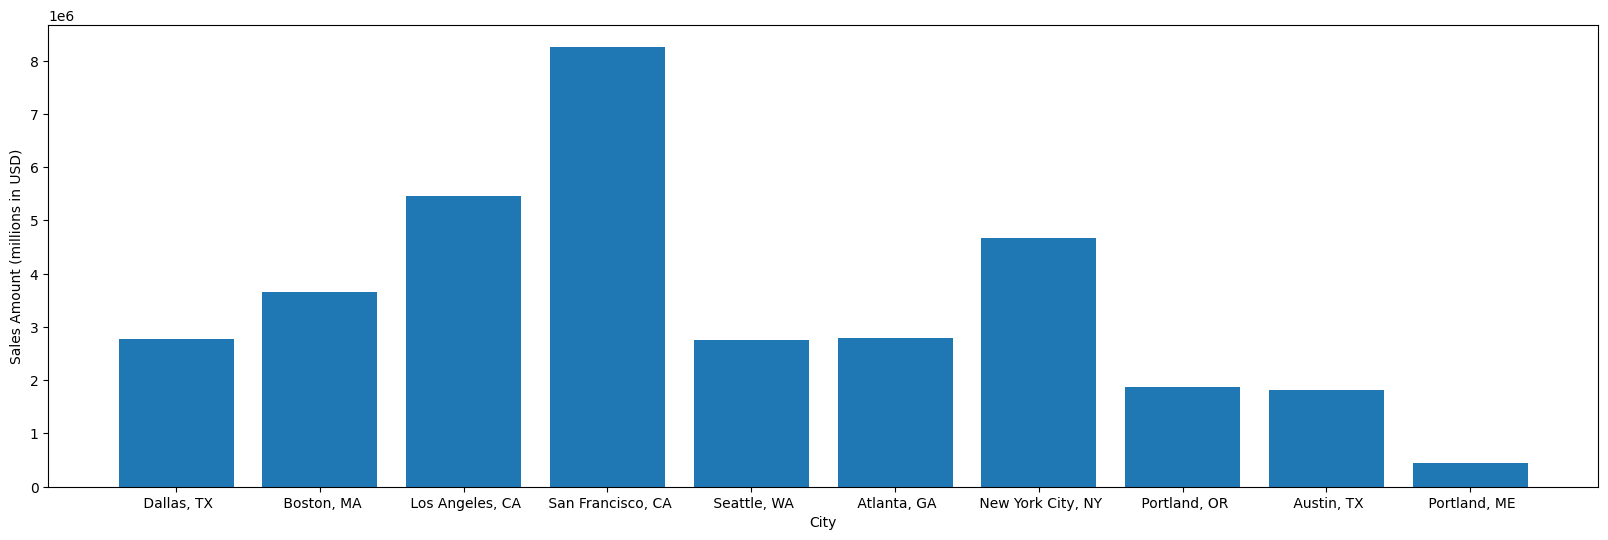

In [65]:
cities = sales_by_location.keys()

plt.figure(figsize=(20, 6))
plt.bar(cities, sales_by_location.values())
plt.xlabel("City")
plt.ylabel("Sales Amount (millions in USD)")

In [ ]:
# Question 3: What time should we display advertisements to maximize likelihood
#     of customer's buying products?

